In [3]:
%gui qt
import matplotlib.pyplot as plt
from skimage.filters import threshold_local, threshold_isodata, gaussian, try_all_threshold, threshold_yen
from skimage.io import imread, imshow
from skimage import exposure
from skimage.segmentation import watershed
from skimage.feature import peak_local_max
from skimage.feature import blob_dog, blob_log, blob_doh
import numpy as np
from scipy import ndimage as ndi
import matplotlib
import matplotlib.pyplot as plt
import napari

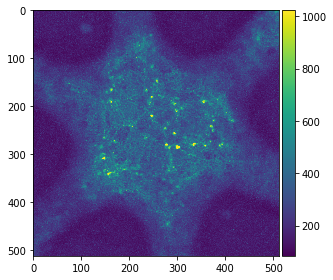

In [4]:
filename  = "/Users/mrestrep/projects/borton/calacium_images/example_data/Preprocessedfiles/MAX_6_2_2_24_10x_4minadjust_isa.tif"
raw = imread(filename)
imshow(raw)

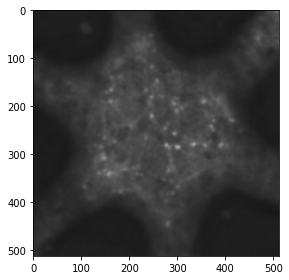

In [5]:
gaussian_image = gaussian(raw*50, sigma = 2.5)
imshow(gaussian_image)

skimage.filters.thresholding.threshold_isodata
skimage.filters.thresholding.threshold_li
skimage.filters.thresholding.threshold_mean
skimage.filters.thresholding.threshold_minimum
skimage.filters.thresholding.threshold_otsu
skimage.filters.thresholding.threshold_triangle
skimage.filters.thresholding.threshold_yen


(<Figure size 576x360 with 8 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x132c08280>,
       dtype=object))

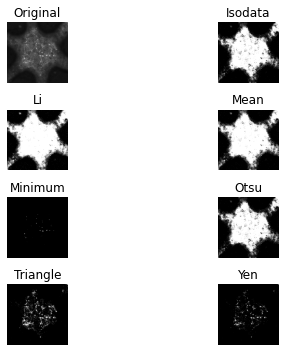

In [7]:
try_all_threshold(raw)

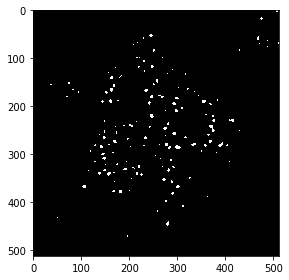

In [8]:
lt = threshold_local(gaussian_image, 5, method = 'mean')
binary_lt = gaussian_image > lt + (lt*.02)
imshow(binary_lt)

In [9]:
distance = ndi.distance_transform_edt(binary_lt)
local_maxi = peak_local_max(distance, indices=False, footprint=np.ones((3, 3)),
                            labels=binary_lt)
markers = ndi.label(local_maxi)[0]
labels = watershed(-distance, markers, mask=binary_lt)

In [10]:
nc = len(np.unique(labels))
cmap = matplotlib.colors.ListedColormap ( np.random.rand (nc,3))

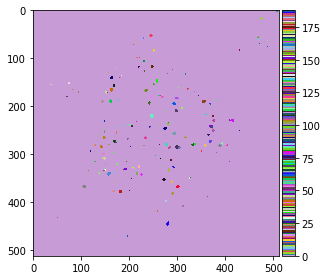

In [11]:
imshow(labels, cmap=cmap)

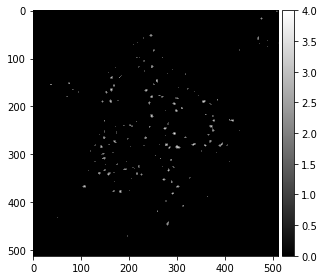

In [12]:
imshow(distance, cmap=plt.cm.gray)

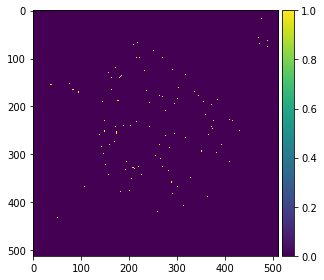

In [13]:
imshow(local_maxi) 

In [29]:
blobs_log = blob_log(distance, min_sigma=1, max_sigma=5, threshold=0.03, overlap=0.5, exclude_border=1) 


In [39]:
# create the viewer with an image
viewer = napari.view_image(distance, rgb=False)
viewer.add_image(gaussian_image, rgb=False)
viewer.add_points(blobs_log[:, 0:2],
                    edge_width=1,
                    edge_color='coral',
                    face_color='royalblue',
                    name='points',
                    size=blobs_log[:,2])

<Points layer 'points' at 0x138b36e50>

In [36]:
blobs_log

array([[280.        , 277.        ,   1.88888889],
       [256.        , 294.        ,   1.88888889],
       [285.        , 300.        ,   2.33333333],
       [ 52.        , 245.        ,   1.88888889],
       [220.        , 247.        ,   1.88888889],
       [190.        , 355.        ,   2.33333333],
       [308.        , 147.        ,   1.88888889],
       [280.        , 333.        ,   2.33333333],
       [281.        , 358.        ,   1.88888889],
       [190.        , 162.        ,   1.88888889],
       [180.        , 247.        ,   1.88888889],
       [165.        , 163.        ,   1.88888889],
       [377.        , 182.        ,   1.88888889],
       [246.        , 274.        ,   1.88888889],
       [241.        , 370.        ,   1.88888889],
       [367.        , 107.        ,   1.88888889],
       [146.        , 258.        ,   1.88888889],
       [444.        , 280.        ,   2.33333333],
       [229.        , 415.        ,   1.88888889],
       [209.        , 298.     

In [38]:
np.unique(blobs_log[:,2])

array([1.        , 1.44444444, 1.88888889, 2.33333333])